In [1]:
import numpy as np
import scipy
import implicit

print(np.__version__)
print(scipy.__version__)
print(implicit.__version__)

1.21.4
1.7.1
0.4.8


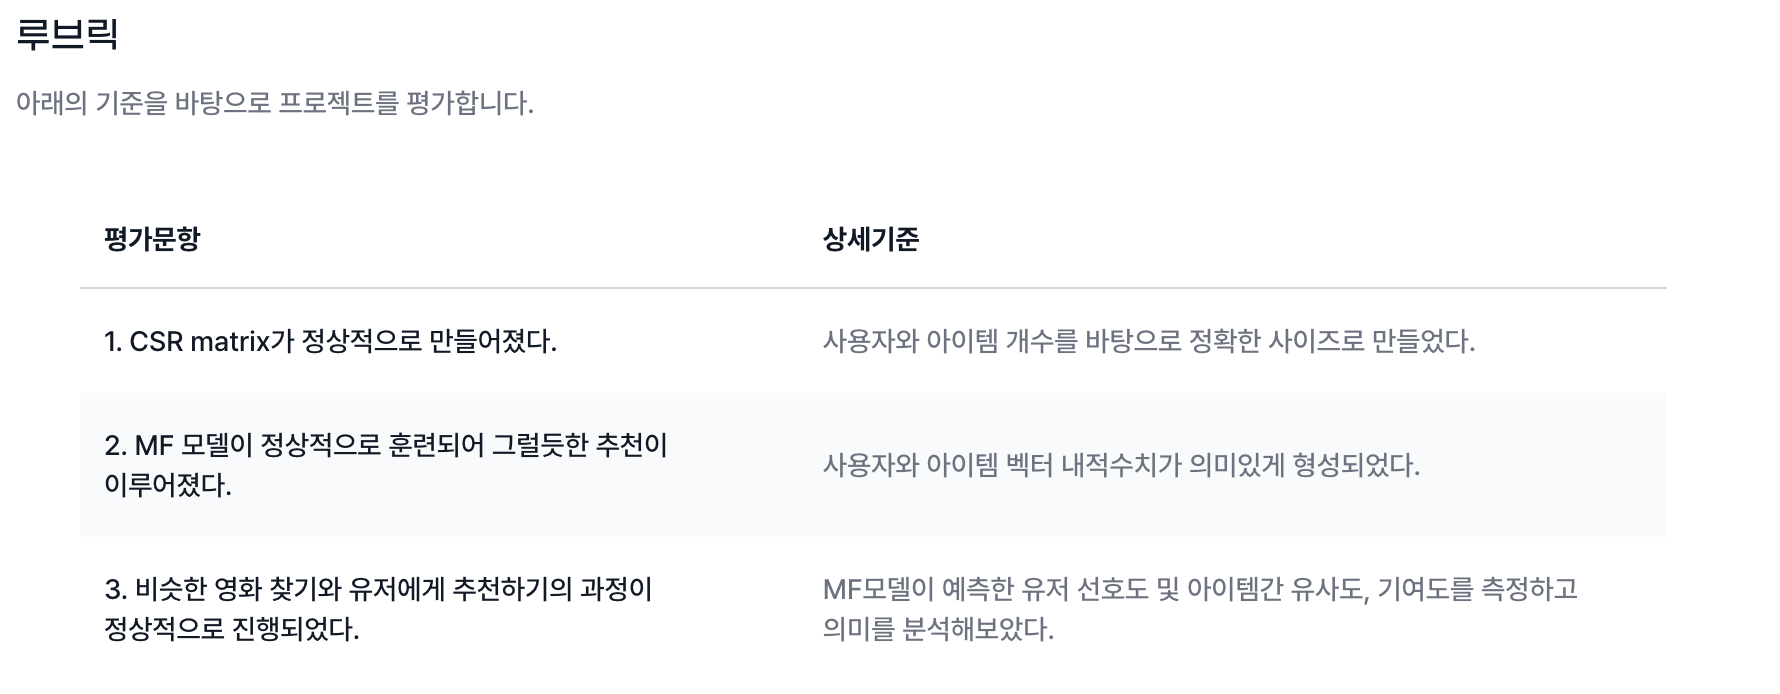

In [2]:
import os
import pandas as pd

rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [4]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [5]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [6]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.tail()

,movie_id,title,genre
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


#### 데이터 확인 및 merge

In [8]:
movies.shape

(3883, 3)

In [9]:
ratings.shape

(836478, 4)

In [10]:
movies.isna().mean()

movie_id    0.0
title       0.0
genre       0.0
dtype: float64

In [11]:
ratings.isna().mean()

user_id      0.0
movie_id     0.0
counts       0.0
timestamp    0.0
dtype: float64

In [12]:
ratings[ratings.duplicated()]

,user_id,movie_id,counts,timestamp


In [13]:
movies[movies.duplicated()]

,movie_id,title,genre


- 결측값, 중복값 없으므로 데이터 통합

In [14]:
df = movies.merge(ratings)
df.sample(3)  

,movie_id,title,genre,user_id,counts,timestamp
481695,2072,"'burbs, The (1989)",Comedy,4897,3,962719692
723881,3250,Alive (1993),Drama,3146,3,968965041
744685,3365,"Searchers, The (1956)",Western,5166,5,961930929


In [15]:
3883+836478

840361

In [16]:
pd.to_datetime(ratings['timestamp'], unit='s')

0         2000-12-31 22:12:40
1         2000-12-31 22:35:09
2         2000-12-31 22:32:48
3         2000-12-31 22:04:35
4         2001-01-06 23:38:11
                  ...        
1000203   2000-04-26 02:18:38
1000205   2000-04-25 23:21:27
1000206   2000-04-25 23:19:06
1000207   2000-04-26 02:20:48
1000208   2000-04-26 02:19:29
Name: timestamp, Length: 836478, dtype: datetime64[ns]

### 2. 분석해 봅시다.
- ratings에 있는 유니크한 영화 개수
- ratings에 있는 유니크한 사용자 수
- 가장 인기 있는 영화 30개(인기순)

In [17]:
ratings.sample(3)

,user_id,movie_id,counts,timestamp
655045,3945,370,3,965692279
630087,3808,1247,4,965970464
489076,3012,1253,4,970599253


In [18]:
import pandas as pd
import numpy as np

# 예시 데이터 생성 (실제 데이터에 대한 대체)
# ratings = pd.DataFrame({
#     'user_id': [1, 2, 3, 5]  # 예시로 4가 누락된 상태
# })

# 기대하는 user_id 값의 범위 생성
expected_user_ids = set(range(1, 6041))

# 실제 데이터에서 유니크한 user_id 값 추출
actual_user_ids = set(ratings['user_id'].unique())

# 누락된 user_id 찾기
missing_user_ids = expected_user_ids - actual_user_ids

print(f"Missing user_id values: {missing_user_ids}")


Missing user_id values: {3598}


In [19]:
ratings

,user_id,movie_id,counts,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [20]:
ratings.shape

(836478, 4)

In [21]:
# ratings에 있는 유니크한 영화 개수
ratings['movie_id'].nunique()

3628

In [22]:
# ratings에 있는 유니크한 사용자 수
ratings['user_id'].nunique()

6039

In [23]:
# 가장 인기 있는 영화 30개(인기순)
movie_count = ratings.groupby('movie_id')['user_id'].count()
movie_count = movie_count.sort_values(ascending=False).head(30)

In [24]:
movie_count = movie_count.reset_index()
movie_count = movie_count.rename(columns={'user_id':'rating_count'})
movie_count

,movie_id,rating_count
0,2858,3211
1,260,2910
2,1196,2885
3,1210,2716
4,2028,2561
5,589,2509
6,593,2498
7,1198,2473
8,1270,2460
9,2571,2434


In [25]:
movie_count = df.groupby('title')['user_id'].count()
movie_count.sort_values(ascending=False).head(30)

title
American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Pr

### 3. 내가 선호하는 영화를 5가지 골라서 ratings에 추가해 줍시다.
- L.A. Confidential (1997)
- Contact (1997)
- Silence of the Lambs, The (1991)
- Dead Poets Society (1989)	              
- Schindler's List (1993)

In [26]:
movies[movies.title == "Contact (1997)"]

,movie_id,title,genre
1543,1584,Contact (1997),Drama|Sci-Fi


In [27]:
movies[movies.title == "Dead Poets Society (1989)"]

,movie_id,title,genre
1226,1246,Dead Poets Society (1989),Drama


In [28]:
movies[movies.title == "L.A. Confidential (1997)"]

,movie_id,title,genre
1575,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller


In [29]:
movies[movies.title == "Silence of the Lambs, The (1991)"]

,movie_id,title,genre
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller


In [30]:
movies[movies.title.str.contains("List")]

,movie_id,title,genre
523,527,Schindler's List (1993),Drama|War


- 좋아하는 영화 제목들 찾기.. 

user_id	movie_id	counts	timestamp

In [31]:
ratings_ = ratings.drop(columns=['timestamp']).copy()

In [32]:
ratings_

,user_id,movie_id,counts
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000203,6040,1090,3
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [33]:
ratings_['user_id'].nunique()

6039

In [34]:
rows_to_add = [
    {'user_id': 3598, 'movie_id': 1584, 'counts': 5},
    {'user_id': 3598, 'movie_id': 1246, 'counts': 5},
    {'user_id': 3598, 'movie_id': 1617, 'counts': 5},
    {'user_id': 3598, 'movie_id': 593, 'counts': 5},
    {'user_id': 3598, 'movie_id': 527, 'counts': 5},
]

In [35]:
ratings_ = ratings_.append(rows_to_add, ignore_index=True)

In [36]:
ratings_.tail(10)

,user_id,movie_id,counts
836473,6040,1090,3
836474,6040,1094,5
836475,6040,562,5
836476,6040,1096,4
836477,6040,1097,4
836478,3598,1584,5
836479,3598,1246,5
836480,3598,1617,5
836481,3598,593,5
836482,3598,527,5


In [37]:
ratings_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836483 entries, 0 to 836482
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   836483 non-null  int64
 1   movie_id  836483 non-null  int64
 2   counts    836483 non-null  int64
dtypes: int64(3)
memory usage: 19.1 MB


In [38]:
ratings_['user_id'].value_counts().sort_values()

4486       1
3598       5
4349       7
4636       9
4365       9
        ... 
1015    1145
3618    1146
1680    1515
4277    1715
4169    1968
Name: user_id, Length: 6040, dtype: int64

### 4. CSR matrix를 직접 만들어 봅시다.

In [63]:
from scipy.sparse import csr_matrix
data = movies.merge(ratings_)
data.reset_index(drop=True, inplace=True)
data.sort_values(by='user_id').tail(10)

,movie_id,title,genre,user_id,counts
305946,1264,Diva (1981),Action|Drama|Mystery|Romance|Thriller,6040,4
355859,1392,Citizen Ruth (1996),Comedy|Drama,6040,5
308067,1265,Groundhog Day (1993),Comedy|Romance,6040,4
396483,1635,"Ice Storm, The (1997)",Drama,6040,4
527290,2301,History of the World: Part I (1981),Comedy,6040,4
237720,1127,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller,6040,3
741085,3359,Breaking Away (1979),Drama,6040,4
526971,2300,"Producers, The (1968)",Comedy|Musical,6040,5
482448,2076,Blue Velvet (1986),Drama|Mystery,6040,5
38885,161,Crimson Tide (1995),Drama|Thriller|War,6040,3


In [41]:
data = data.drop(columns=['title', 'genre'])
data.tail(10)

,movie_id,user_id,counts
836473,3952,5333,4
836474,3952,5359,5
836475,3952,5405,4
836476,3952,5475,5
836477,3952,5602,3
836478,3952,5682,3
836479,3952,5812,4
836480,3952,5831,3
836481,3952,5837,4
836482,3952,5998,4


In [64]:
data.shape

(836483, 5)

In [42]:
data.sort_values(by='user_id').tail(10)

,movie_id,user_id,counts
305946,1264,6040,4
355859,1392,6040,5
308067,1265,6040,4
396483,1635,6040,4
527290,2301,6040,4
237720,1127,6040,3
741085,3359,6040,4
526971,2300,6040,5
482448,2076,6040,5
38885,161,6040,3


In [43]:
data['user_id'].nunique()

6040

In [52]:
num_user = data['user_id'].nunique() 
num_movie = data['movie_id'].nunique()
num_user, num_movie

(6040, 3628)

In [55]:
# csr_data = csr_matrix((data.counts, (data.user_id, data.movie_id)),
#                      shape=(num_user, num_movie))
# csr_data

In [65]:
from scipy.sparse import csr_matrix
import pandas as pd

user_ids = data['user_id'].values
movie_ids = data['movie_id'].values
counts = data['counts'].values

user_id_mapping = pd.factorize(user_ids)[0]
movie_id_mapping = pd.factorize(movie_ids)[0]

num_user = user_id_mapping.max() + 1
num_movie = movie_id_mapping.max() + 1

csr_data = csr_matrix((counts, (user_id_mapping, movie_id_mapping)), shape=(num_user, num_movie))

In [ ]:
num_movie

### 5. als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련시켜 봅시다.



In [66]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [67]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [68]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [69]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

### 6. 내가 선호하는 5가지 영화 중 하나와 그 외의 영화 하나를 골라 훈련된 모델이 예측한 나의 선호도를 파악해 보세요.

In [ ]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

### 7. 내가 좋아하는 영화와 비슷한 영화를 추천받아 봅시다.


In [70]:
movie_title = 'Contact (1997)'
movie_id = data.loc[data['title'] == movie_title, 'movie_id'].values[0]
movie_id

1584

In [73]:
data.loc[data['title'] == movie_title, 'movie_id']

382963    1584
382964    1584
382965    1584
382966    1584
382967    1584
          ... 
384197    1584
384198    1584
384199    1584
384200    1584
384201    1584
Name: movie_id, Length: 1239, dtype: int64

In [71]:
similar_movie = als_model.similar_items(movie_id, N=15)
similar_movie

[(1584, 1.0),
 (2970, 0.55790484),
 (1559, 0.52744806),
 (1705, 0.5137276),
 (2081, 0.4994439),
 (10, 0.47172254),
 (342, 0.45533037),
 (1473, 0.45391536),
 (2295, 0.42120248),
 (1194, 0.41828308),
 (2118, 0.41789547),
 (1666, 0.4110738),
 (1355, 0.39257902),
 (343, 0.3925277),
 (1369, 0.391265)]

In [79]:
def get_movie_title(movie_id):
    try:
        title = data.loc[data['movie_id'] == movie_id, 'title'].values[0]
        return title
    except IndexError:
        return None

similar_movies_with_titles = [(movie_id, get_movie_title(movie_id), similarity) for movie_id, similarity in similar_movie]

for movie_id, title, similarity in similar_movies_with_titles:
    if title is not None:
        print(f"Movie ID: {movie_id}, Title: {title}, Similarity: {similarity}")
    else:
        print(f"Movie ID: {movie_id}, Title: Not Found, Similarity: {similarity}")

Movie ID: 1584, Title: Contact (1997), Similarity: 1.0
Movie ID: 2970, Title: Fitzcarraldo (1982), Similarity: 0.557904839515686
Movie ID: 1559, Title: Not Found, Similarity: 0.5274480581283569
Movie ID: 1705, Title: Not Found, Similarity: 0.513727605342865
Movie ID: 2081, Title: Little Mermaid, The (1989), Similarity: 0.4994438886642456
Movie ID: 10, Title: GoldenEye (1995), Similarity: 0.4717225432395935
Movie ID: 342, Title: Muriel's Wedding (1994), Similarity: 0.45533037185668945
Movie ID: 1473, Title: Best Men (1997), Similarity: 0.4539153575897217
Movie ID: 2295, Title: Impostors, The (1998), Similarity: 0.42120248079299927
Movie ID: 1194, Title: Up in Smoke (1978), Similarity: 0.418283075094223
Movie ID: 2118, Title: Dead Zone, The (1983), Similarity: 0.41789546608924866
Movie ID: 1666, Title: Hugo Pool (1997), Similarity: 0.41107380390167236
Movie ID: 1355, Title: Nightwatch (1997), Similarity: 0.39257901906967163
Movie ID: 343, Title: Baby-Sitters Club, The (1995), Similarity:

### 8. 내가 가장 좋아할 만한 영화들을 추천받아 봅시다.


In [ ]:
user = Silence of the Lambs, The (1991)
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

In [ ]:
[idx_to_artist[i[0]] for i in artist_recommended]

In [ ]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

In [ ]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]